<a href="https://colab.research.google.com/github/JamilePolycarpo/MachineLearning/blob/main/Autoencoders_Exemplo_Simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Autoencoders - Exemplo Simples

In [ ]:
from tensorflow import keras
from keras import layers
from keras.utils import plot_model
from keras import regularizers

In [ ]:
import tensorflow as tf

if tf.config.list_physical_devices('GPU'):
  tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)



Vamos gerar alguns dados aleatórios em 3D usando a função `make_classification` do [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html).

In [ ]:
from sklearn.datasets import make_blobs, make_classification
X,y = make_classification(n_samples=500, n_features=3, n_redundant=0,
                          random_state=10, class_sep=.5)

Em seguida, vamos verificar como os dados gerados se parecem:

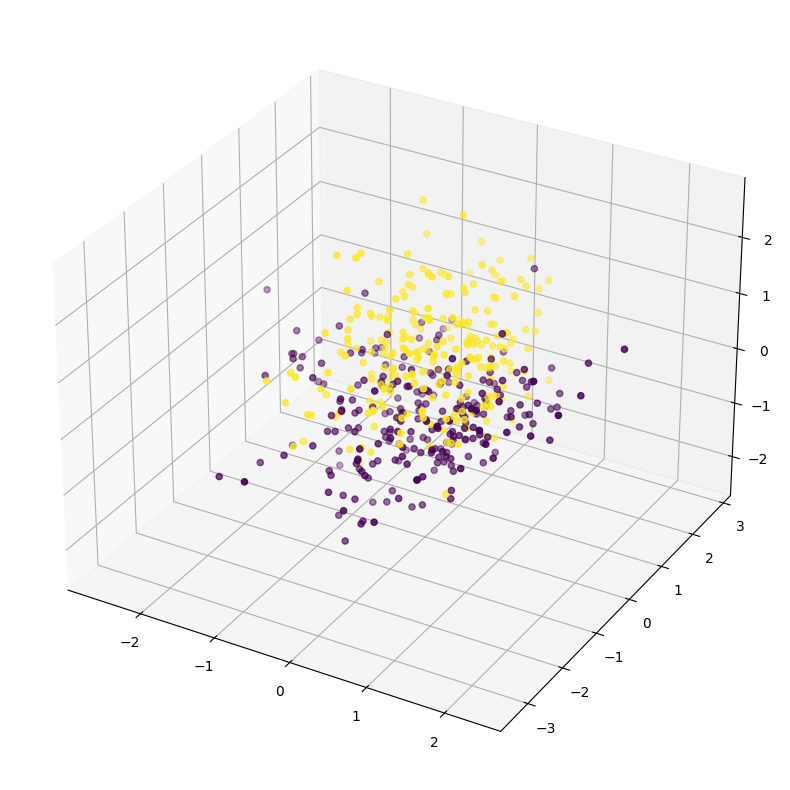

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y)

Agora vamos construir o autoencoder para os dados que acabamos de gerar.
Este autoencoder tem apenas uma camada oculta para o codificador e uma para o decodificador.

Nosso objetivo aqui é reduzir a dimensionalidade dos dados de $\mathcal{R}^3$ para $\mathcal{R}^2$.

In [ ]:
encoding_dim = 2

input_layer = keras.Input(shape=(3,))
encoded = layers.Dense(encoding_dim, activation="sigmoid")(input_layer)
decoded = layers.Dense(3, activation="sigmoid")(encoded)
autoencoder = keras.Model(input_layer, decoded)

Precisamos construir modelos separados para o codificador e o decodificador para avaliar a qualidade deles.

In [ ]:
encoder = keras.Model(input_layer, encoded)

encoded_input = keras.Input(shape=(encoding_dim,)) #the size of the encoder output

decoder_layer = autoencoder.layers[-1]

decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

Vamos treinar nosso modelo usando a função de perda MSE (erro quadrático médio) e o otimizador de descida de gradiente estocástica (SGD):

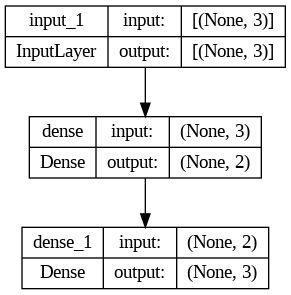

In [ ]:
autoencoder.compile(loss="mse", optimizer="SGD")
plot_model(autoencoder, to_file='autoencoder.png', show_shapes=True)

Realizaremos o treinamento do nosso modelo por 100 épocas.

In [ ]:
history = autoencoder.fit(X, X, epochs=100, verbose=1)

Epoch 1/100
16/16 [==============================] - 4s 6ms/step - loss: 0.9191
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.9160
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.9129
Epoch 4/100
16/16 [==============================] - 0s 7ms/step - loss: 0.9098
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 0.9068
Epoch 6/100
16/16 [==============================] - 0s 9ms/step - loss: 0.9039
Epoch 7/100
16/16 [==============================] - 0s 12ms/step - loss: 0.9011
Epoch 8/100
16/16 [==============================] - 0s 11ms/step - loss: 0.8983
Epoch 9/100
16/16 [==============================] - 0s 8ms/step - loss: 0.8955
Epoch 10/100
16/16 [==============================] - 0s 5ms/step - loss: 0.8929
Epoch 11/100
16/16 [==============================] - 0s 5ms/step - loss: 0.8902
Epoch 12/100
16/16 [==============================] - 0s 6ms/step - loss: 0.8876
Epoch 13/100
16/16 [===============

Agora, vamos verificar como pode ser o espaço latente:

16/16 [==============================] - 0s 2ms/step


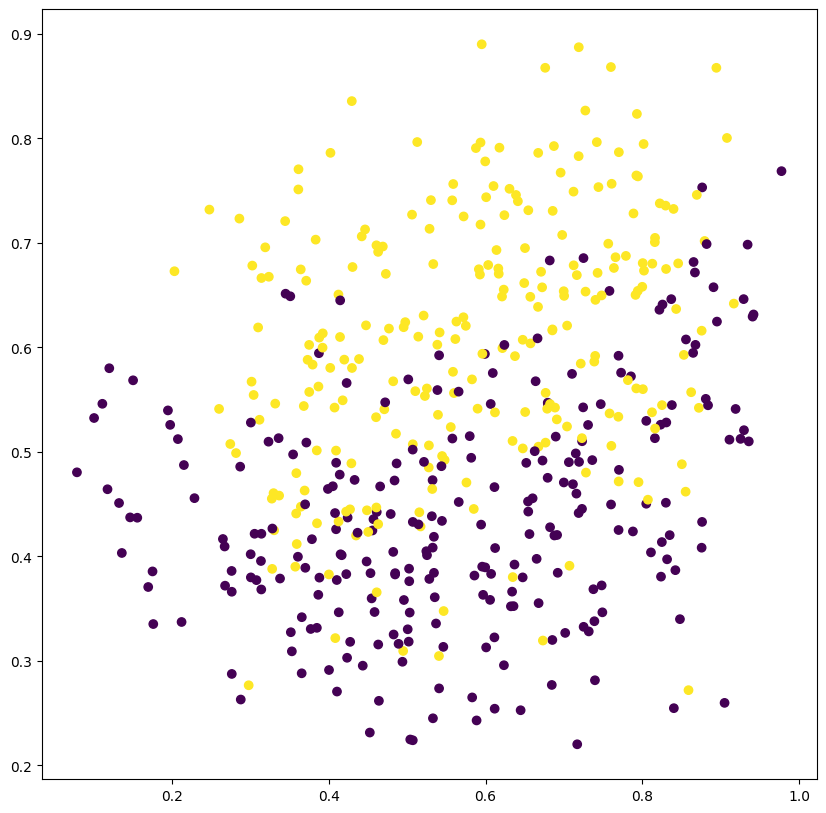

In [ ]:
codings = encoder.predict(X)
fig = plt.figure(figsize=(10,10))
plt.scatter(codings[:,0], codings[:, 1], c=y)
plt.show()

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

4422102/4422102 [==============================] - 1s 0us/step
(60000, 784)
(10000, 784)


In [ ]:
# Este é o tamanho das nossas representações codificadas
encoding_dim = 100

# Esta é a nossa imagem de entrada
input_img = keras.Input(shape=(784,))

# Adicionar uma camada Dense com um regularizador de atividade L1
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)

# "decoded" é a reconstrução com perda da entrada
decoded = layers.Dense(784, activation='relu')(encoded)

# Este modelo mapeia uma entrada para sua reconstrução
autoencoder = keras.Model(input_img, decoded)

In [ ]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 784)               79184     
                                                                 
Total params: 157684 (615.95 KB)
Trainable params: 157684 (615.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose=2)

Epoch 1/100
235/235 - 2s - loss: 0.0405 - val_loss: 0.0231 - 2s/epoch - 9ms/step
Epoch 2/100
235/235 - 1s - loss: 0.0202 - val_loss: 0.0182 - 813ms/epoch - 3ms/step
Epoch 3/100
235/235 - 1s - loss: 0.0170 - val_loss: 0.0160 - 736ms/epoch - 3ms/step
Epoch 4/100
235/235 - 1s - loss: 0.0154 - val_loss: 0.0149 - 751ms/epoch - 3ms/step
Epoch 5/100
235/235 - 1s - loss: 0.0145 - val_loss: 0.0143 - 794ms/epoch - 3ms/step
Epoch 6/100
235/235 - 1s - loss: 0.0139 - val_loss: 0.0137 - 728ms/epoch - 3ms/step
Epoch 7/100
235/235 - 1s - loss: 0.0133 - val_loss: 0.0132 - 780ms/epoch - 3ms/step
Epoch 8/100
235/235 - 1s - loss: 0.0130 - val_loss: 0.0129 - 1s/epoch - 5ms/step
Epoch 9/100
235/235 - 1s - loss: 0.0126 - val_loss: 0.0128 - 1s/epoch - 5ms/step
Epoch 10/100
235/235 - 1s - loss: 0.0124 - val_loss: 0.0124 - 1s/epoch - 4ms/step
Epoch 11/100
235/235 - 1s - loss: 0.0121 - val_loss: 0.0120 - 722ms/epoch - 3ms/step
Epoch 12/100
235/235 - 1s - loss: 0.0120 - val_loss: 0.0118 - 768ms/epoch - 3ms/step
E

In [ ]:
# Codificar e decodificar alguns dígitos
# Note que os pegamos do conjunto de *teste*
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(encoded_imgs)

313/313 [==============================] - 1s 3ms/step


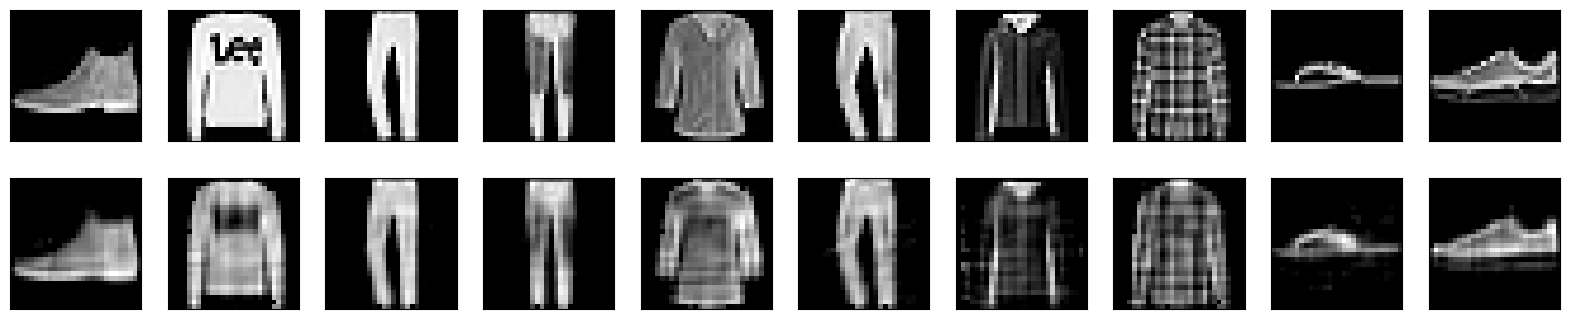

In [ ]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Exercícios

Use o [Fashion MNIST](https://keras.io/api/datasets/fashion_mnist/) para construir um autoencoder simples e realizar as seguintes tarefas:
1. Tente diferentes valores para o tamanho do espaço latente e relate a diferença na imagem reconstruída (você provavelmente precisará usar otimizadores/funções de perda melhores).
2. Utilize o [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) para visualizar dados de alta dimensão em um mapa bidimensional ou tridimensional. Tente visualizar como é o Espaço Latente usando a [implementação do scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html).
  1. Ao olhar para o t-SNE do Espaço Latente, você acha que os Autoencoders são uma boa ferramenta para gerar dados?

{32}
Epoch 1/20
235/235 - 3s - loss: 0.0598 - val_loss: 0.0336 - 3s/epoch - 12ms/step
Epoch 2/20
235/235 - 5s - loss: 0.0284 - val_loss: 0.0247 - 5s/epoch - 20ms/step
Epoch 3/20
235/235 - 2s - loss: 0.0225 - val_loss: 0.0206 - 2s/epoch - 10ms/step
Epoch 4/20
235/235 - 2s - loss: 0.0192 - val_loss: 0.0179 - 2s/epoch - 9ms/step
Epoch 5/20
235/235 - 2s - loss: 0.0170 - val_loss: 0.0162 - 2s/epoch - 8ms/step
Epoch 6/20
235/235 - 2s - loss: 0.0157 - val_loss: 0.0153 - 2s/epoch - 9ms/step
Epoch 7/20
235/235 - 3s - loss: 0.0148 - val_loss: 0.0146 - 3s/epoch - 11ms/step
Epoch 8/20
235/235 - 3s - loss: 0.0143 - val_loss: 0.0142 - 3s/epoch - 15ms/step
Epoch 9/20
235/235 - 2s - loss: 0.0139 - val_loss: 0.0139 - 2s/epoch - 8ms/step
Epoch 10/20
235/235 - 2s - loss: 0.0137 - val_loss: 0.0136 - 2s/epoch - 10ms/step
Epoch 11/20
235/235 - 2s - loss: 0.0135 - val_loss: 0.0135 - 2s/epoch - 9ms/step
Epoch 12/20
235/235 - 2s - loss: 0.0134 - val_loss: 0.0133 - 2s/epoch - 9ms/step
Epoch 13/20
235/235 - 1s -

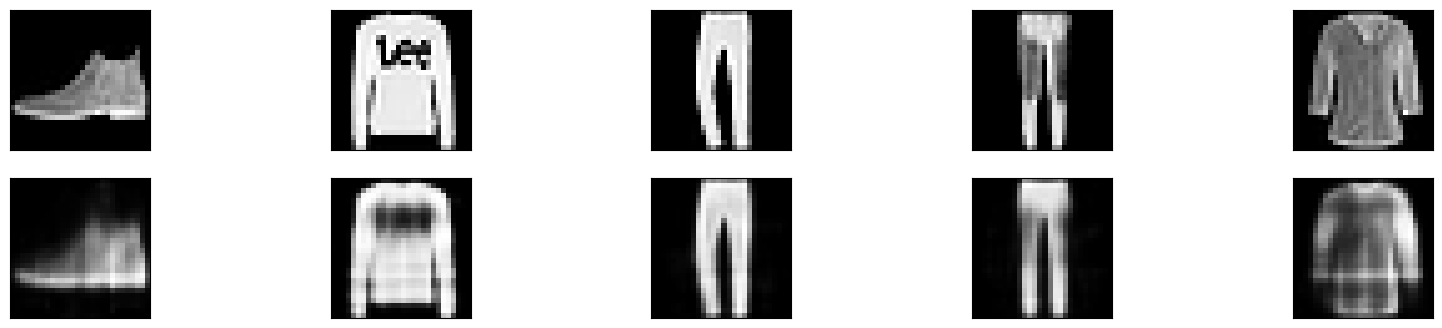

{64}
Epoch 1/20
235/235 - 2s - loss: 0.0509 - val_loss: 0.0277 - 2s/epoch - 10ms/step
Epoch 2/20
235/235 - 3s - loss: 0.0234 - val_loss: 0.0203 - 3s/epoch - 11ms/step
Epoch 3/20
235/235 - 1s - loss: 0.0179 - val_loss: 0.0161 - 1s/epoch - 6ms/step
Epoch 4/20
235/235 - 2s - loss: 0.0148 - val_loss: 0.0139 - 2s/epoch - 7ms/step
Epoch 5/20
235/235 - 2s - loss: 0.0131 - val_loss: 0.0125 - 2s/epoch - 7ms/step
Epoch 6/20
235/235 - 1s - loss: 0.0120 - val_loss: 0.0116 - 1s/epoch - 6ms/step
Epoch 7/20
235/235 - 1s - loss: 0.0113 - val_loss: 0.0110 - 1s/epoch - 6ms/step
Epoch 8/20
235/235 - 1s - loss: 0.0107 - val_loss: 0.0106 - 1s/epoch - 6ms/step
Epoch 9/20
235/235 - 2s - loss: 0.0104 - val_loss: 0.0103 - 2s/epoch - 8ms/step
Epoch 10/20
235/235 - 3s - loss: 0.0101 - val_loss: 0.0101 - 3s/epoch - 11ms/step
Epoch 11/20
235/235 - 2s - loss: 0.0099 - val_loss: 0.0099 - 2s/epoch - 7ms/step
Epoch 12/20
235/235 - 2s - loss: 0.0097 - val_loss: 0.0097 - 2s/epoch - 6ms/step
Epoch 13/20
235/235 - 1s - lo

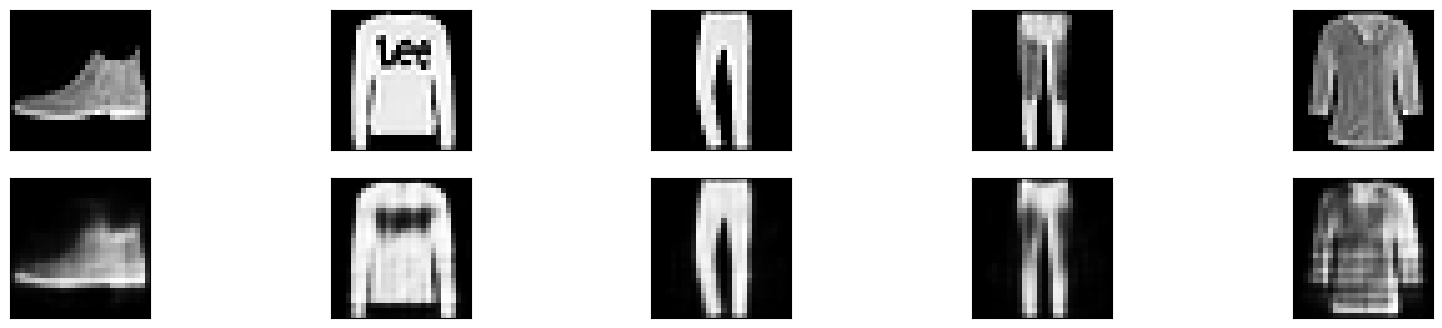

{128}
Epoch 1/20
235/235 - 3s - loss: 0.0448 - val_loss: 0.0243 - 3s/epoch - 11ms/step
Epoch 2/20
235/235 - 2s - loss: 0.0196 - val_loss: 0.0160 - 2s/epoch - 9ms/step
Epoch 3/20
235/235 - 3s - loss: 0.0140 - val_loss: 0.0126 - 3s/epoch - 14ms/step
Epoch 4/20
235/235 - 2s - loss: 0.0116 - val_loss: 0.0109 - 2s/epoch - 9ms/step
Epoch 5/20
235/235 - 2s - loss: 0.0103 - val_loss: 0.0099 - 2s/epoch - 9ms/step
Epoch 6/20
235/235 - 2s - loss: 0.0094 - val_loss: 0.0091 - 2s/epoch - 9ms/step
Epoch 7/20
235/235 - 2s - loss: 0.0088 - val_loss: 0.0086 - 2s/epoch - 9ms/step
Epoch 8/20
235/235 - 2s - loss: 0.0083 - val_loss: 0.0083 - 2s/epoch - 9ms/step
Epoch 9/20
235/235 - 4s - loss: 0.0079 - val_loss: 0.0078 - 4s/epoch - 15ms/step
Epoch 10/20
235/235 - 2s - loss: 0.0075 - val_loss: 0.0077 - 2s/epoch - 9ms/step
Epoch 11/20
235/235 - 2s - loss: 0.0072 - val_loss: 0.0072 - 2s/epoch - 9ms/step
Epoch 12/20
235/235 - 2s - loss: 0.0070 - val_loss: 0.0069 - 2s/epoch - 9ms/step
Epoch 13/20
235/235 - 2s - l

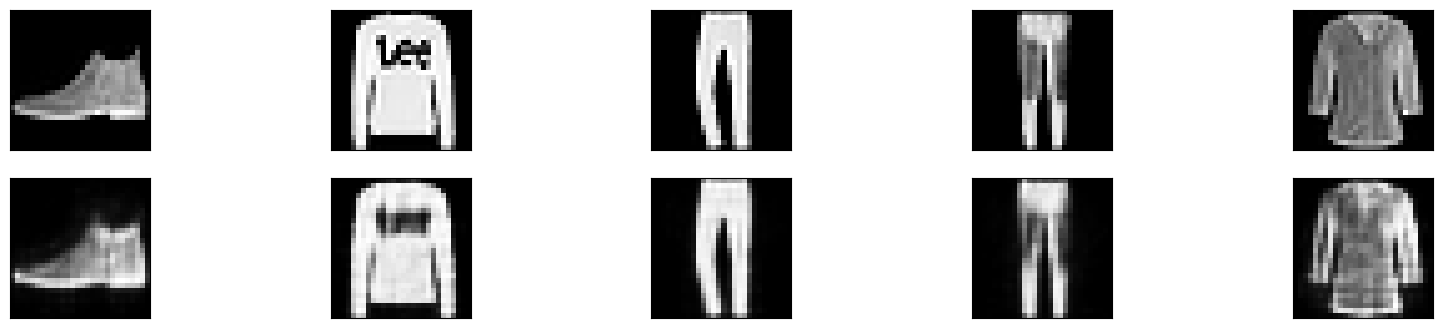

{256}
Epoch 1/20
235/235 - 4s - loss: 0.0384 - val_loss: 0.0190 - 4s/epoch - 17ms/step
Epoch 2/20
235/235 - 4s - loss: 0.0150 - val_loss: 0.0122 - 4s/epoch - 18ms/step
Epoch 3/20
235/235 - 4s - loss: 0.0110 - val_loss: 0.0098 - 4s/epoch - 16ms/step
Epoch 4/20
235/235 - 3s - loss: 0.0091 - val_loss: 0.0085 - 3s/epoch - 14ms/step
Epoch 5/20
235/235 - 3s - loss: 0.0080 - val_loss: 0.0076 - 3s/epoch - 14ms/step
Epoch 6/20
235/235 - 5s - loss: 0.0073 - val_loss: 0.0069 - 5s/epoch - 19ms/step
Epoch 7/20
235/235 - 3s - loss: 0.0065 - val_loss: 0.0064 - 3s/epoch - 13ms/step
Epoch 8/20
235/235 - 3s - loss: 0.0061 - val_loss: 0.0062 - 3s/epoch - 14ms/step
Epoch 9/20
235/235 - 3s - loss: 0.0058 - val_loss: 0.0056 - 3s/epoch - 14ms/step
Epoch 10/20
235/235 - 5s - loss: 0.0054 - val_loss: 0.0053 - 5s/epoch - 20ms/step
Epoch 11/20
235/235 - 3s - loss: 0.0051 - val_loss: 0.0051 - 3s/epoch - 13ms/step
Epoch 12/20
235/235 - 3s - loss: 0.0049 - val_loss: 0.0049 - 3s/epoch - 14ms/step
Epoch 13/20
235/235

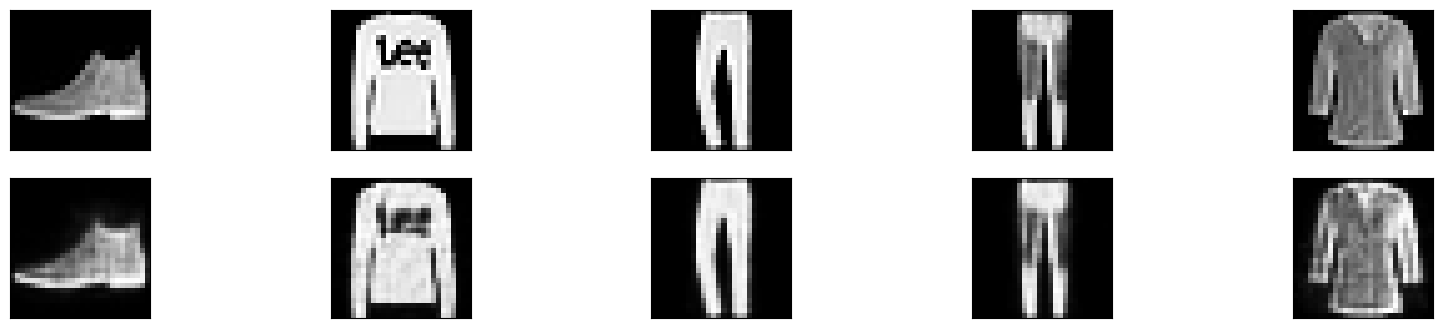

Epoch 1/20
235/235 - 3s - loss: 0.0521 - val_loss: 0.0297 - 3s/epoch - 14ms/step
Epoch 2/20
235/235 - 2s - loss: 0.0247 - val_loss: 0.0206 - 2s/epoch - 6ms/step
Epoch 3/20
235/235 - 1s - loss: 0.0181 - val_loss: 0.0162 - 1s/epoch - 6ms/step
Epoch 4/20
235/235 - 2s - loss: 0.0148 - val_loss: 0.0138 - 2s/epoch - 6ms/step
Epoch 5/20
235/235 - 1s - loss: 0.0131 - val_loss: 0.0125 - 1s/epoch - 6ms/step
Epoch 6/20
235/235 - 1s - loss: 0.0121 - val_loss: 0.0118 - 1s/epoch - 6ms/step
Epoch 7/20
235/235 - 1s - loss: 0.0114 - val_loss: 0.0112 - 1s/epoch - 6ms/step
Epoch 8/20
235/235 - 2s - loss: 0.0109 - val_loss: 0.0108 - 2s/epoch - 8ms/step
Epoch 9/20
235/235 - 3s - loss: 0.0106 - val_loss: 0.0106 - 3s/epoch - 11ms/step
Epoch 10/20
235/235 - 2s - loss: 0.0103 - val_loss: 0.0102 - 2s/epoch - 6ms/step
Epoch 11/20
235/235 - 2s - loss: 0.0100 - val_loss: 0.0100 - 2s/epoch - 6ms/step
Epoch 12/20
235/235 - 1s - loss: 0.0098 - val_loss: 0.0098 - 1s/epoch - 6ms/step
Epoch 13/20
235/235 - 1s - loss: 0.

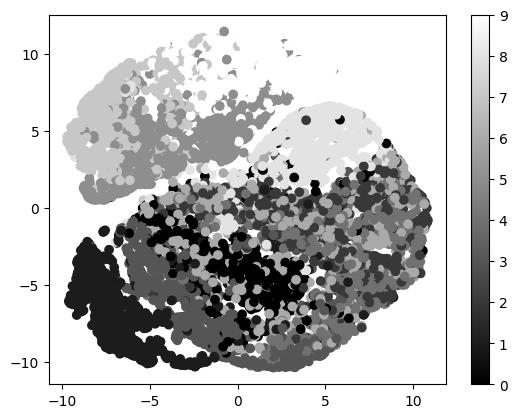

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from keras import regularizers
from keras import layers

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


def build_autoencoder(encoding_dim):
    input_img = keras.Input(shape=(784,))
    encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
    decoded = layers.Dense(784, activation='sigmoid')(encoded)

    autoencoder = keras.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder.fit(x_train, x_train,
                    epochs=20,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(x_test, x_test),
                    verbose=2)



    return autoencoder

encoding_dims = [32, 64, 128, 256]
for encoding_dim in encoding_dims:
    print({encoding_dim})
    autoencoder = build_autoencoder(encoding_dim)

    # Codificar e decodificar alguns dígitos

    encoded_imgs = autoencoder.predict(x_test)
    decoded_imgs = autoencoder.predict(encoded_imgs)

    n = 5
    plt.figure(figsize=(20, 4))

    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()


encoding_dim = 64
autoencoder = build_autoencoder(encoding_dim)
encoder = keras.Model(autoencoder.input, autoencoder.layers[1].output)
encoder_img = encoder.predict(x_test)

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(encoder_img)

plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=y_test)
plt.colorbar()
plt.show()



Olhando para o t-SNE do Espaço Latente, acho que o autoencoder é uma boa forma de gerar dados

